In [1]:
"""Backend supported: tensorflow.compat.v1, tensorflow, pytorch, jax, paddle"""
import deepxde as dde
import numpy as np

2024-11-08 07:19:45.878468: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/cuda-12.5/lib64:
2024-11-08 07:19:45.878518: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
Using backend: tensorflow.compat.v1
Other supported backends: tensorflow, pytorch, jax, paddle.
paddle supports more examples now and is recommended.


Instructions for updating:
non-resource variables are not supported in the long term


2024-11-08 07:19:52.559866: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2024-11-08 07:19:52.560412: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/cuda-12.5/lib64:
2024-11-08 07:19:52.560600: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublas.so.11'; dlerror: libcublas.so.11: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/cuda-12.5/lib64:
2024-11-08 07:19:52.560769: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublasLt.so.11'; dlerror: libcublasLt.so.11: cannot open shared object file: No such file or directory; L

Compiling model...
Building feed-forward neural network...
'build' took 0.120081 s



/home/user/mambaforge/envs/deepxd/lib/python3.8/site-packages/deepxde/nn/tensorflow_compat_v1/fnn.py:116: UserWarning: `tf.layers.dense` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dense` instead.
  return tf.layers.dense(
/home/user/mambaforge/envs/deepxd/lib/python3.8/site-packages/keras/legacy_tf_layers/core.py:255: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  return layer.apply(inputs)
2024-11-06 06:11:36.107790: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


'compile' took 0.310136 s

Training model...

Step      Train loss    Test loss     Test metric   
0         [5.10e-01]    [4.50e-01]    [1.47e+00]    
1000      [2.34e-04]    [2.21e-04]    [3.25e-02]    
2000      [9.87e-05]    [1.26e-04]    [2.45e-02]    
3000      [6.40e-05]    [9.77e-05]    [2.16e-02]    
4000      [4.56e-05]    [7.81e-05]    [1.93e-02]    
5000      [1.58e-04]    [2.12e-04]    [3.19e-02]    
6000      [2.04e-05]    [4.32e-05]    [1.44e-02]    
7000      [7.64e-06]    [2.96e-05]    [1.19e-02]    
8000      [4.71e-06]    [2.45e-05]    [1.08e-02]    
9000      [4.73e-06]    [2.37e-05]    [1.06e-02]    
10000     [2.97e-06]    [2.01e-05]    [9.81e-03]    

Best model at step 10000:
  train loss: 2.97e-06
  test loss: 2.01e-05
  test metric: [9.81e-03]

'train' took 6.634107 s

Saving loss history to /home/user/pinn/examples/loss.dat ...
Saving training data to /home/user/pinn/examples/train.dat ...
Saving test data to /home/user/pinn/examples/test.dat ...


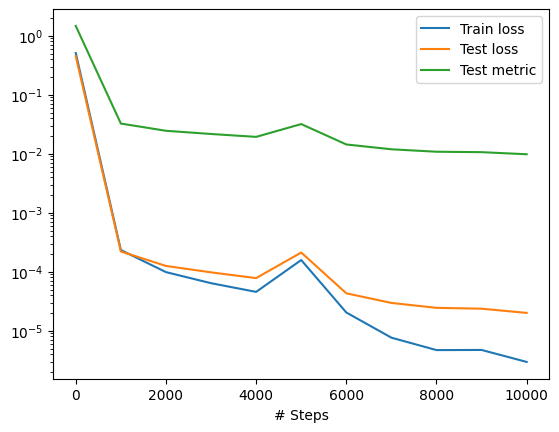

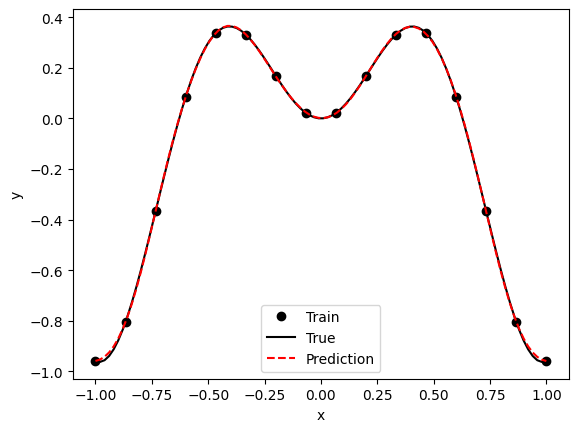

In [2]:

def func(x):
    """
    x: array_like, N x D_in
    y: array_like, N x D_out
    """
    return x * np.sin(5 * x)


geom = dde.geometry.Interval(-1, 1)
num_train = 16
num_test = 100
data = dde.data.Function(geom, func, num_train, num_test)

activation = "tanh"
initializer = "Glorot uniform"
net = dde.nn.FNN([1] + [20] * 3 + [1], activation, initializer)

model = dde.Model(data, net)
model.compile("adam", lr=0.001, metrics=["l2 relative error"])
losshistory, train_state = model.train(iterations=10000)

dde.saveplot(losshistory, train_state, issave=True, isplot=True)

Saving loss history to /home/user/pinn/examples/loss.dat ...
Saving training data to /home/user/pinn/examples/train.dat ...
Saving test data to /home/user/pinn/examples/test.dat ...


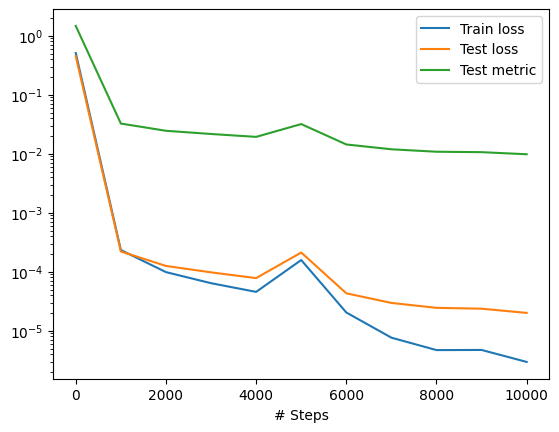

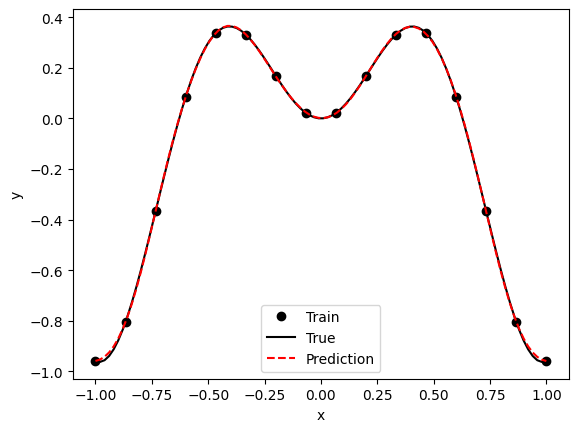

In [4]:
fname_train = "./dataset/dataset.train"
fname_test = "./dataset/dataset.test"

data = dde.data.DataSet(
    fname_train=fname_train,
    fname_test=fname_test,
    col_x=(0,),
    col_y=(1,),
    standardize=True,
)

layer_size = [1] + [50] * 3 + [1]
activation = "tanh"
initializer = "Glorot normal"
net = dde.nn.FNN(layer_size, activation, initializer)

dde.saveplot(losshistory, train_state, issave=True, isplot=True)

Compiling model...
Building feed-forward neural network...
'build' took 0.078946 s



/home/user/mambaforge/envs/deepxd/lib/python3.8/site-packages/deepxde/nn/tensorflow_compat_v1/fnn.py:116: UserWarning: `tf.layers.dense` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dense` instead.
  return tf.layers.dense(
/home/user/mambaforge/envs/deepxd/lib/python3.8/site-packages/keras/legacy_tf_layers/core.py:255: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  return layer.apply(inputs)


'compile' took 0.472718 s

Training model...

Step      Train loss                                  Test loss                                   Test metric   
0         [2.04e-02, 1.25e-01, 0.00e+00, 1.00e+00]    [1.88e-02, 1.29e-01, 0.00e+00, 1.00e+00]    [1.02e+00]    
1000      [8.22e-03, 7.07e-03, 6.77e-09, 2.96e-04]    [9.28e-03, 7.01e-03, 6.77e-09, 2.96e-04]    [7.74e-01]    
2000      [5.83e-03, 4.27e-03, 9.83e-07, 1.26e-04]    [6.02e-03, 4.45e-03, 9.83e-07, 1.26e-04]    [6.20e-01]    
3000      [2.62e-03, 3.08e-03, 1.40e-06, 4.97e-05]    [2.71e-03, 3.14e-03, 1.40e-06, 4.97e-05]    [4.28e-01]    
4000      [3.75e-04, 4.12e-04, 6.54e-05, 1.08e-05]    [3.80e-04, 3.15e-04, 6.54e-05, 1.08e-05]    [1.12e-01]    
5000      [4.38e-05, 1.51e-05, 1.48e-08, 3.41e-08]    [3.37e-05, 1.71e-05, 1.48e-08, 3.41e-08]    [1.42e-02]    
6000      [9.82e-05, 5.17e-05, 3.71e-05, 2.45e-07]    [9.57e-05, 5.01e-05, 3.71e-05, 2.45e-07]    [1.17e-02]    
7000      [6.50e-06, 4.72e-06, 3.66e-09, 5.46e-10]

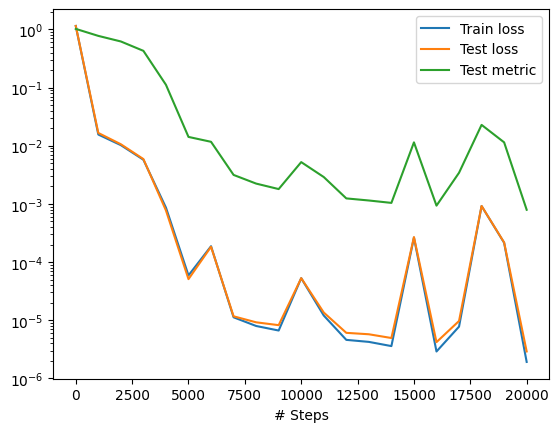

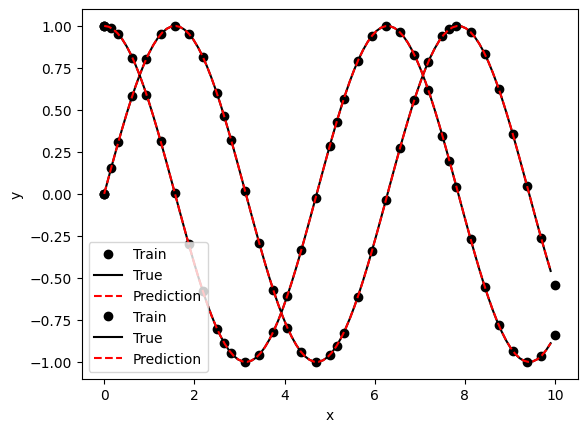

In [5]:


def ode_system(x, y):
    """ODE system.
    dy1/dx = y2
    dy2/dx = -y1
    """
    # Most backends
    y1, y2 = y[:, 0:1], y[:, 1:]
    dy1_x = dde.grad.jacobian(y, x, i=0)
    dy2_x = dde.grad.jacobian(y, x, i=1)
    # Backend jax
    # y_val, y_fn = y
    # y1, y2 = y_val[:, 0:1], y_val[:, 1:]
    # dy1_x, _ = dde.grad.jacobian(y, x, i=0)
    # dy2_x, _ = dde.grad.jacobian(y, x, i=1)
    return [dy1_x - y2, dy2_x + y1]


def boundary(_, on_initial):
    return on_initial


def func(x):
    """
    y1 = sin(x)
    y2 = cos(x)
    """
    return np.hstack((np.sin(x), np.cos(x)))


geom = dde.geometry.TimeDomain(0, 10)
ic1 = dde.icbc.IC(geom, lambda x: 0, boundary, component=0)
ic2 = dde.icbc.IC(geom, lambda x: 1, boundary, component=1)
data = dde.data.PDE(geom, ode_system, [ic1, ic2], 35, 2, solution=func, num_test=100)

layer_size = [1] + [50] * 3 + [2]
activation = "tanh"
initializer = "Glorot uniform"
net = dde.nn.FNN(layer_size, activation, initializer)

model = dde.Model(data, net)
model.compile("adam", lr=0.001, metrics=["l2 relative error"])
losshistory, train_state = model.train(iterations=20000)

dde.saveplot(losshistory, train_state, issave=True, isplot=True)

Compiling model...
Building feed-forward neural network...
'build' took 0.070860 s



/home/user/mambaforge/envs/deepxd/lib/python3.8/site-packages/deepxde/nn/tensorflow_compat_v1/fnn.py:116: UserWarning: `tf.layers.dense` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dense` instead.
  return tf.layers.dense(
/home/user/mambaforge/envs/deepxd/lib/python3.8/site-packages/keras/legacy_tf_layers/core.py:255: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  return layer.apply(inputs)
2024-11-08 07:20:06.933559: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


'compile' took 0.555001 s

Training model...

Step      Train loss                                  Test loss                                   Test metric
0         [2.50e-02, 9.04e-03, 3.32e-02, 5.85e-01]    [2.50e-02, 9.04e-03, 3.32e-02, 5.85e-01]    []  
1000      [3.29e-04, 3.46e-05, 2.46e-04, 1.04e-04]    [3.29e-04, 3.46e-05, 2.46e-04, 1.04e-04]    []  
2000      [1.67e-04, 1.56e-05, 9.77e-05, 3.88e-05]    [1.67e-04, 1.56e-05, 9.77e-05, 3.88e-05]    []  
3000      [5.85e-05, 7.94e-06, 2.04e-05, 1.01e-05]    [5.85e-05, 7.94e-06, 2.04e-05, 1.01e-05]    []  
4000      [1.92e-05, 1.94e-06, 2.74e-06, 1.91e-06]    [1.92e-05, 1.94e-06, 2.74e-06, 1.91e-06]    []  
5000      [1.03e-05, 2.42e-07, 5.03e-07, 3.77e-07]    [1.03e-05, 2.42e-07, 5.03e-07, 3.77e-07]    []  
6000      [8.82e-06, 8.00e-07, 1.17e-06, 9.07e-07]    [8.82e-06, 8.00e-07, 1.17e-06, 9.07e-07]    []  
7000      [7.01e-06, 3.90e-08, 1.63e-07, 1.69e-07]    [7.01e-06, 3.90e-08, 1.63e-07, 1.69e-07]    []  
8000      [6.54e-06,

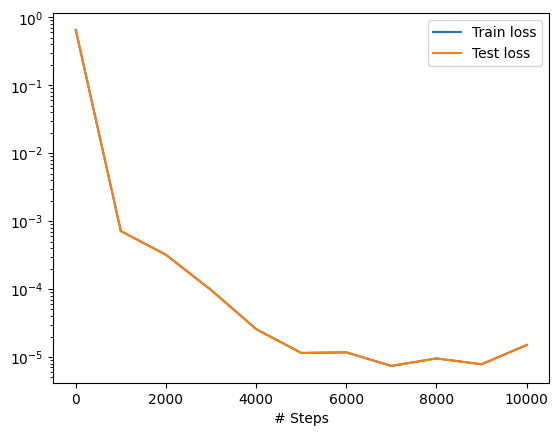

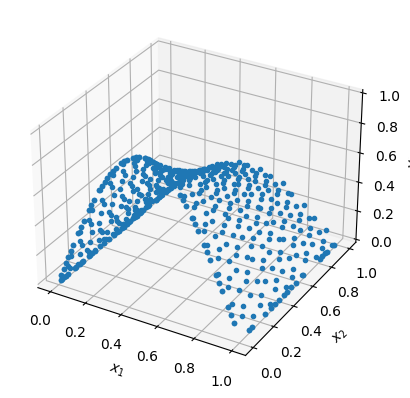

In [2]:
import deepxde as dde
import numpy as np

# Define the geometry and time domain
geom = dde.geometry.Interval(0, 1)      # Spatial domain (x in [0, 1])
timedomain = dde.geometry.TimeDomain(0, 1)  # Time domain (t in [0, 1])
geomtime = dde.geometry.GeometryXTime(geom, timedomain)

# Define the PDE
def pde(x, u):
    du_dt = dde.grad.jacobian(u, x, i=0, j=1)  # partial u / partial t
    d2u_dx2 = dde.grad.hessian(u, x, i=0, j=0)  # second partial u / partial x^2
    return du_dt - alpha * d2u_dx2

# Initial and boundary conditions
def initial_condition(x):
    return np.sin(np.pi * x[:, 0:1])  # Example initial condition

bc_left = dde.DirichletBC(geomtime, lambda x: 0, lambda x, on_boundary: on_boundary and np.isclose(x[0], 0))
bc_right = dde.DirichletBC(geomtime, lambda x: 0, lambda x, on_boundary: on_boundary and np.isclose(x[0], 1))
ic = dde.IC(geomtime, initial_condition, lambda x, on_initial: on_initial)

# Define the problem
alpha = 0.1  # Diffusivity constant
data = dde.data.TimePDE(
    geomtime, pde, [bc_left, bc_right, ic], num_domain=400, num_boundary=50, num_initial=50
)

# Define the neural network model
net = dde.maps.FNN([2] + [50] * 3 + [1], "tanh", "Glorot normal")

# Create and compile the model
model = dde.Model(data, net)
model.compile("adam", lr=0.001)

# Train the model
losshistory, train_state = model.train(epochs=10000)

# Plot and save the solution
dde.saveplot(losshistory, train_state, issave=True, isplot=True)


Compiling model...
Building feed-forward neural network...
'build' took 0.097171 s



/home/user/mambaforge/envs/deepxd/lib/python3.8/site-packages/deepxde/nn/tensorflow_compat_v1/fnn.py:116: UserWarning: `tf.layers.dense` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dense` instead.
  return tf.layers.dense(
/home/user/mambaforge/envs/deepxd/lib/python3.8/site-packages/keras/legacy_tf_layers/core.py:255: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  return layer.apply(inputs)


'compile' took 0.640151 s

Training model...

Step      Train loss                        Test loss                         Test metric   
0         [6.98e-02, 1.00e+00, 2.43e+00]    [7.11e-02, 1.00e+00, 2.43e+00]    [9.78e-01]    
1000      [3.19e-02, 5.18e-03, 3.24e-03]    [2.95e-02, 5.18e-03, 3.24e-03]    [1.18e+00]    
2000      [1.55e-02, 8.18e-03, 3.55e-03]    [1.56e-02, 8.18e-03, 3.55e-03]    [1.23e+00]    
3000      [8.41e-04, 1.14e-04, 4.22e-05]    [6.79e-04, 1.14e-04, 4.22e-05]    [1.11e+00]    
4000      [2.81e-04, 6.58e-06, 1.42e-06]    [2.07e-04, 6.58e-06, 1.42e-06]    [1.10e+00]    
5000      [2.65e-04, 6.29e-06, 2.16e-06]    [1.95e-04, 6.29e-06, 2.16e-06]    [1.10e+00]    
6000      [2.48e-04, 6.93e-06, 2.55e-06]    [1.81e-04, 6.93e-06, 2.55e-06]    [1.10e+00]    
7000      [2.32e-04, 6.35e-06, 1.73e-06]    [1.68e-04, 6.35e-06, 1.73e-06]    [1.10e+00]    
8000      [2.07e-04, 7.78e-06, 8.03e-06]    [1.52e-04, 7.78e-06, 8.03e-06]    [1.10e+00]    
9000      [5.88e-04, 4.6

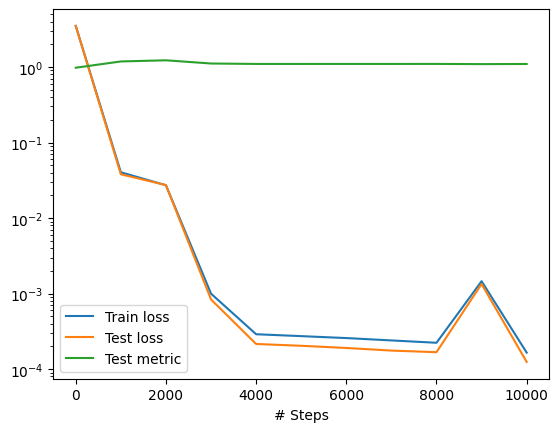

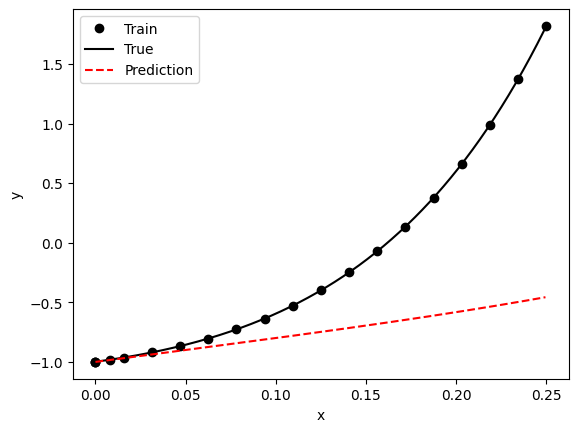

In [4]:
"""Backend supported: tensorflow.compat.v1, tensorflow, pytorch, paddle"""

R = 50 #ohms
L = 10.6 #mH
C = 1.06 #uF

def ode(t, y):
    dy_dt = dde.grad.jacobian(y, t)
    d2y_dt2 = dde.grad.hessian(y, t)
    return d2y_dt2 - (R/L)* dy_dt - (1/C*L) * y


def func(t):
    return 50 / 81 + t * 5 / 9 - 2 * np.exp(t) + (31 / 81) * np.exp(9 * t)


geom = dde.geometry.TimeDomain(0, 0.25)


def boundary_l(t, on_initial):
    return on_initial and dde.utils.isclose(t[0], 0)


def bc_func1(inputs, outputs, X):
    return outputs + 1


def bc_func2(inputs, outputs, X):
    return dde.grad.jacobian(outputs, inputs, i=0, j=None) - 2

ic1 = dde.icbc.IC(geom, lambda x: -1, lambda _, on_initial: on_initial)
ic2 = dde.icbc.OperatorBC(geom, bc_func2, boundary_l)

data = dde.data.TimePDE(geom, ode, [ic1, ic2], 16, 2, solution=func, num_test=500)
layer_size = [1] + [50] * 3 + [1]
activation = "tanh"
initializer = "Glorot uniform"
net = dde.nn.FNN(layer_size, activation, initializer)

model = dde.Model(data, net)
model.compile(
    "adam", lr=0.001, metrics=["l2 relative error"], loss_weights=[0.01, 1, 1]
)
losshistory, train_state = model.train(iterations=10000)

dde.saveplot(losshistory, train_state, issave=True, isplot=True)

Compiling model...
Building feed-forward neural network...
'build' took 0.123883 s



/home/user/mambaforge/envs/deepxd/lib/python3.8/site-packages/deepxde/nn/tensorflow_compat_v1/fnn.py:116: UserWarning: `tf.layers.dense` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dense` instead.
  return tf.layers.dense(
/home/user/mambaforge/envs/deepxd/lib/python3.8/site-packages/keras/legacy_tf_layers/core.py:255: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  return layer.apply(inputs)


'compile' took 0.746162 s

Training model...

Step      Train loss                                  Test loss                                   Test metric
0         [1.27e-02, 5.53e+00, 1.29e+00, 2.04e-03]    [1.27e-02, 5.53e+00, 1.29e+00, 2.04e-03]    []  
1000      [2.68e-01, 4.02e+00, 8.48e-03, 1.23e-02]    [2.68e-01, 4.02e+00, 8.48e-03, 1.23e-02]    []  
2000      [4.28e-01, 3.45e+00, 4.97e-02, 5.76e-03]    [4.28e-01, 3.45e+00, 4.97e-02, 5.76e-03]    []  
3000      [5.10e-01, 3.02e+00, 2.24e-02, 1.19e-02]    [5.10e-01, 3.02e+00, 2.24e-02, 1.19e-02]    []  
4000      [5.62e-01, 2.62e+00, 7.15e-03, 2.45e-02]    [5.62e-01, 2.62e+00, 7.15e-03, 2.45e-02]    []  
5000      [5.42e-01, 2.30e+00, 3.86e-03, 2.76e-02]    [5.42e-01, 2.30e+00, 3.86e-03, 2.76e-02]    []  

Best model at step 5000:
  train loss: 2.88e+00
  test loss: 2.88e+00
  test metric: []

'train' took 18.107661 s

Saving loss history to /home/user/pinn/examples/loss.dat ...
Saving training data to /home/user/pinn/examples/

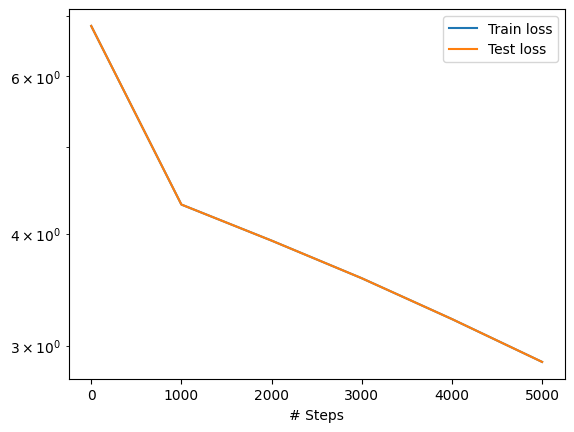

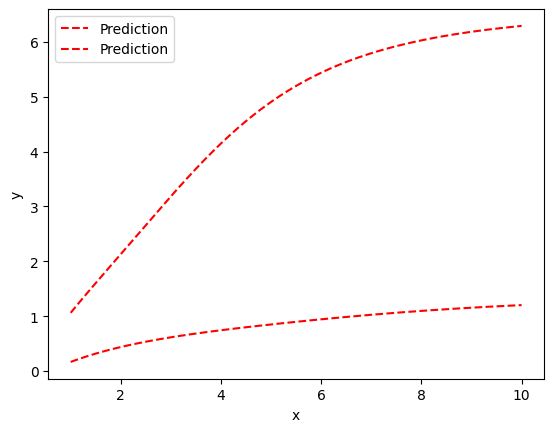

In [8]:
import deepxde as dde
import tensorflow as tf
import numpy as np

# Define the system of ODEs
def ode_system(x, y):
    y1, y2 = y[:, 0:1], y[:, 1:2]
    dy1_dt = dde.grad.jacobian(y, x, i=0, j=0)
    dy2_dt = dde.grad.jacobian(y, x, i=1, j=0)
    
    # Parameters
    a = 1.0  # Example value for 'a'
    b = 1.0  # Example value for 'b'

    eq1 = dy1_dt - y2
    eq2 = dy2_dt + a * tf.math.divide_no_nan(y1, x) * tf.math.pow(y2, 1/3) - b * tf.sqrt(x)
    return [eq1, eq2]

# Define the time domain
geom = dde.geometry.TimeDomain(1, 10)  # Example time domain from t=1 to t=10

# Corrected Initial Conditions
def ic_y1(x):
    return np.full_like(x, 1.0)  # Returns array with the same shape as `x` filled with the value 1.0

def ic_y2(x):
    return np.full_like(x, 0.0)  # Returns array with the same shape as `x` filled with the value 0.0

# Apply initial conditions
ic1 = dde.IC(geom, ic_y1, lambda _, on_initial: on_initial, component=0)
ic2 = dde.IC(geom, ic_y2, lambda _, on_initial: on_initial, component=1)

# Define the data object for DeepXDE
data = dde.data.TimePDE(
    geom, ode_system, [ic1, ic2], num_domain=400, num_boundary=50
)

# Define the neural network
net = dde.maps.FNN([1] + [40] * 4 + [2], "tanh", "Glorot normal")

# Create the model
model = dde.Model(data, net)

# Compile the model with a lower learning rate
model.compile("adam", lr=0.00001)

# Train the model with monitoring to detect potential issues
losshistory, train_state = model.train(epochs=5000)

# Plot and save the results
dde.saveplot(losshistory, train_state, issave=True, isplot=True)


In [ ]:
!pip install nvidia-modulus


Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
     ━━━━╺━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.6/319.0 MB 22.2 MB/s eta 0:00:13